In [1]:
from utils import *
from fastai.vision.all import *
from fastbook import *

In [2]:
matplotlib.rc('image', cmap='Greys')

In [178]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path

In [179]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [5]:
(path/'training').ls().sorted()

(#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')]

In [6]:
zeroes = (path/'training/0').ls().sorted()
ones = (path/'training/1').ls().sorted()
twos = (path/'training/2').ls().sorted()
threes = (path/'training/3').ls().sorted()
fours = (path/'training/4').ls().sorted()
fives = (path/'training/5').ls().sorted()
sixes = (path/'training/6').ls().sorted()
sevens = (path/'training/7').ls().sorted()
eights = (path/'training/8').ls().sorted()
nines = (path/'training/9').ls().sorted()

In [7]:
im_9 = Image.open(nines[1])
im_9

In [8]:
stacked_0 = torch.stack([tensor(Image.open(o)) for o in zeroes])

In [9]:
stacked_1 = torch.stack([tensor(Image.open(o)) for o in ones])

In [10]:
stacked_2 = torch.stack([tensor(Image.open(o)) for o in twos])

In [11]:
stacked_3 = torch.stack([tensor(Image.open(o)) for o in threes])

In [12]:
stacked_4= torch.stack([tensor(Image.open(o)) for o in fours])

In [13]:
stacked_5 = torch.stack([tensor(Image.open(o)) for o in fives])

In [14]:
stacked_6 = torch.stack([tensor(Image.open(o)) for o in sixes])

In [15]:
stacked_7 = torch.stack([tensor(Image.open(o)) for o in sevens])

In [16]:
stacked_8 = torch.stack([tensor(Image.open(o)) for o in eights])

In [17]:
stacked_9 = torch.stack([tensor(Image.open(o)) for o in nines])

In [18]:
stacked_0 = stacked_0.float()/255
stacked_1 = stacked_1.float()/255
stacked_2 = stacked_2.float()/255
stacked_3 = stacked_3.float()/255
stacked_4 = stacked_4.float()/255
stacked_5 = stacked_5.float()/255
stacked_6 = stacked_6.float()/255
stacked_7 = stacked_7.float()/255
stacked_8 = stacked_8.float()/255
stacked_9 = stacked_9.float()/255

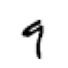

In [19]:
show_image(stacked_9[0]);

In [20]:
stacked_1.shape, len(stacked_3), len(stacked_3)

(torch.Size([6742, 28, 28]), 6131, 6131)

In [21]:
(path/'testing').ls().sorted()

(#10) [Path('testing/0'),Path('testing/1'),Path('testing/2'),Path('testing/3'),Path('testing/4'),Path('testing/5'),Path('testing/6'),Path('testing/7'),Path('testing/8'),Path('testing/9')]

In [22]:
valid_0_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/0').ls()])


In [23]:
valid_1_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/1').ls()])
valid_2_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/2').ls()])
valid_3_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/3').ls()])
valid_4_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/4').ls()])
valid_5_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/5').ls()])
valid_6_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/6').ls()])
valid_7_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/7').ls()])
valid_8_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/8').ls()])
valid_9_tens = torch.stack([(tensor(Image.open(o))).float() / 255 for o in (path/'testing/9').ls()])

In [24]:
train_x = torch.cat([stacked_0, stacked_1, stacked_2, stacked_3, stacked_4, stacked_5, stacked_6, 
                    stacked_7, stacked_8, stacked_9]).view(-1,28*28)

In [25]:
train_x.shape

torch.Size([60000, 784])

In [26]:
train_y = tensor([0]*len(stacked_0) + [1]*len(stacked_1) + [2]*len(stacked_2) + [3]*len(stacked_3) + [4]*len(stacked_4) + 
                    [5]*len(stacked_5) + [6]*len(stacked_6) + [7]*len(stacked_7) + [8]*len(stacked_8) + [9]*len(stacked_9)).unsqueeze(1)

In [27]:
train_y.shape

torch.Size([60000, 1])

In [28]:
valid_x = torch.cat([valid_0_tens, valid_1_tens, valid_2_tens, valid_3_tens, valid_4_tens, valid_5_tens, valid_6_tens,
                    valid_7_tens, valid_8_tens, valid_9_tens,]).view(-1,28*28)

In [29]:
valid_x.shape

torch.Size([10000, 784])

In [30]:
valid_y = tensor([0]*len(valid_0_tens) + [1]*len(valid_1_tens) + [2]*len(valid_2_tens) + [3]*len(valid_3_tens) + [4]*len(valid_4_tens) + 
                    [5]*len(valid_5_tens) + [6]*len(valid_6_tens) + [7]*len(valid_7_tens) + [8]*len(valid_8_tens) + [9]*len(valid_9_tens)).unsqueeze(1)

In [31]:
valid_y.shape

torch.Size([10000, 1])

In [32]:
train_dset = list(zip(train_x,train_y))

In [33]:
x,y = train_dset[0]
x.shape, y

(torch.Size([784]), tensor([0]))

In [34]:
valid_dset = list(zip(valid_x,valid_y))
x,y = valid_dset[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [35]:
train_dl = DataLoader(train_dset,batch_size=256,shuffle=True)

In [36]:
x,y = first(train_dl)
x.shape, y.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [37]:
valid_dl = DataLoader(valid_dset,batch_size=256)

In [38]:
x,y = first(valid_dl)
x.shape, y.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [39]:
acts = torch.randn((256,10)) * 2

In [40]:
def softmax(x) : return torch.exp(x) / torch.exp(x).sum(dim = 1, keepdims=True)

In [41]:
softmax(acts)[0].sum()

tensor(1.0000)

In [95]:
def mnist_loss(inputs,targets) :
    loss_func = nn.CrossEntropyLoss()
    return loss_func(inputs,targets.squeeze())

In [74]:
def init_parameters(size,std=0.5) : return (torch.randn(size) * std).requires_grad_()

In [75]:
w1 = init_parameters((28*28,30))
b1 = init_parameters(30)
w2 = init_parameters((30,10))
b2 = init_parameters(10)

In [76]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [98]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds,yb)
    loss.backward()

In [99]:
batch = train_x[:256]
calc_grad(batch,train_y[:256],simple_net)

In [100]:
w1.grad.mean(), b1.grad.mean()

(tensor(0.0074), tensor(0.0399))

In [101]:
w2.grad.mean(), b2.grad.mean()

(tensor(1.7981e-08), tensor(-5.9605e-09))

In [54]:
def train_epcoh(model, lr, params):
    for x,y in train_dl :
        calc_grad(x,y,model)
        for p in params :
            p.data -= p.grad * lr
            p.grad.zero_()

In [63]:
# a = torch.randn(256,10)
# targ = tensor([x%10 for x in range(256)])
# correct = torch.argmax(a,dim=1) == targ
# correct.float().mean()

tensor(0.0859)

In [64]:
def batch_accuracy(xb , yb) :
    preds = softmax(xb)
    correct = torch.argmax(preds,dim=1) == yb
    return correct.float().mean()

In [66]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb),yb)  for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(),4)

In [102]:
validate_epoch(simple_net)

0.0751

In [103]:
lr = 3e-3
params = w1,b1,w2,b2
train_epcoh(simple_net,lr,params)
validate_epoch(simple_net)

0.2292

In [106]:
for i in range(100) :
    train_epcoh(simple_net,lr,params)
    print(validate_epoch(simple_net), end = ' ')

0.7576 0.7591 0.7595 0.7607 0.7617 0.7628 0.7618 0.7631 0.7638 0.7643 0.766 0.7665 0.767 0.7669 0.7669 0.7688 0.77 0.7708 0.7716 0.7723 0.7726 0.7735 0.7746 0.7756 0.7762 0.777 0.7777 0.7779 0.7792 0.7792 0.7801 0.78 0.7808 0.7811 0.7823 0.7832 0.7831 0.7827 0.7845 0.7845 0.7858 0.7859 0.7864 0.7872 0.7873 0.7874 0.7881 0.7883 0.7896 0.7895 0.7898 0.7907 0.7909 0.7915 0.7917 0.7922 0.7928 0.793 0.793 0.7928 0.7942 0.7937 0.7949 0.7946 0.7958 0.7957 0.7957 0.7959 0.7961 0.7961 0.7967 0.7963 0.7968 0.7978 0.7977 0.7981 0.7981 0.7986 0.7986 0.7989 0.7991 0.7996 0.7999 0.8 0.7999 0.8005 0.8007 0.8012 0.8016 0.8017 0.8024 0.8018 0.8021 0.803 0.8025 0.8031 0.8035 0.8042 0.804 0.8047 

In [165]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,30),
    nn.ReLU(),
    nn.Linear(30,10)
)

In [166]:
class BasicOptim:
    def __init__(self,params,lr) : self.params,self.lr = list(params),lr
    
    def step(self,*args,**kwargs):
        for p in self.params: p.data -= p.grad.data*self.lr
    
    def zero_grad(self,*args,**kwargs):
        for p in self.params: p.grad = None

In [167]:
lr = 3e-3
opt = BasicOptim(simple_net.parameters(),lr)

In [168]:
def train_epoch(model):
    for xb,yb in train_dl:
        calc_grad(xb,yb,model)
        opt.step()
        opt.zero_grad()

In [169]:
validate_epoch(simple_net)

0.1009

In [170]:
def train_model(model,epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model),end=' ')

In [171]:
train_model(simple_net,50)

0.1409 0.221 0.2973 0.3539 0.3765 0.398 0.438 0.47 0.5383 0.6115 0.655 0.6903 0.7101 0.7266 0.7378 0.7506 0.7552 0.7675 0.7712 0.7753 0.7799 0.7839 0.7866 0.7907 0.7936 0.797 0.7995 0.8016 0.8038 0.8072 0.8066 0.8078 0.8094 0.8118 0.8128 0.8134 0.816 0.8167 0.8192 0.8204 0.8204 0.8219 0.8222 0.8239 0.8251 0.8258 0.826 0.8269 0.8276 0.8281 

In [181]:
opt = SGD(simple_net.parameters(),lr)
dls = DataLoaders(train_dl,valid_dl)

In [173]:
learn = Learner(dls,simple_net,opt_func=SGD,loss_func=mnist_loss,metrics=batch_accuracy)

In [174]:
learn.fit(10,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.355082,0.343916,0.830848,00:01
1,0.356122,0.341810,0.831444,00:01
2,0.358357,0.339160,0.831414,00:01
3,0.345696,0.337076,0.831963,00:01
4,0.345089,0.334752,0.832759,00:01
5,0.339256,0.332963,0.832277,00:01
6,0.337479,0.331483,0.833614,00:01
7,0.341586,0.329639,0.833663,00:01
8,0.331291,0.327518,0.833970,00:01
9,0.333767,0.326167,0.834129,00:01


In [175]:
learn.fit(40,0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.310239,0.300468,0.838059,00:01
1,0.270557,0.269517,0.849659,00:01
2,0.245379,0.244634,0.856687,00:01
3,0.220511,0.218369,0.861008,00:01
4,0.210254,0.216919,0.860309,00:01
5,0.190213,0.206123,0.864000,00:01
6,0.177617,0.177942,0.873683,00:01
7,0.168986,0.174412,0.872319,00:01
8,0.154634,0.186969,0.869887,00:01
9,0.146584,0.155456,0.877589,00:01


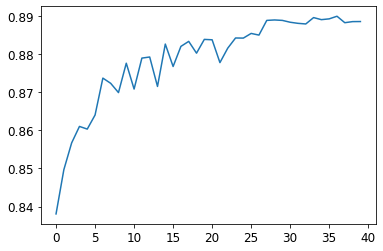

In [176]:
plt.plot(L(learn.recorder.values).itemgot(2));